In [1]:
import networkx as nx
import pandas as pd

# Definitions


In [2]:
definitions = pd.read_json('definitions.json', typ='split')
using_nodes = ["Gene","Compound","Disease"]

#metanodes -"Gene","Compound","Disease"
for node in using_nodes:
    print(f'{node} : {definitions["metanodes"].get(node)}')

Gene : Protein-coding human genes. From Entrez Gene.
Compound : Approved small molecule compounds with documented chemical structures. From DrugBank.
Disease : Complex diseases, selected to be distinct and specific enough to be clinically relevant yet general enough to be well annotated. From Disease Ontology.


In [3]:
not_using_nodes = [node for node in definitions["metanodes"].keys() if node not in using_nodes]

In [4]:
using_edges = []

for edge in definitions["metaedges"].keys():
    e = edge.split('–')
    if (e[0] not in not_using_nodes) and (e[-1] not in not_using_nodes):
        using_edges.append(edge.replace('–',' - '))
        print(f'{edge} : {definitions["metaedges"].get(edge)}','\n')

Compound–binds–Gene : The Compound physically binds to the Gene's protein product according to BindingDB, DrugBank, or DrugCentral 

Compound–downregulates–Gene : The Gene is under-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Compound–palliates–Disease : The Compound is a symptomatic indication for the Disease (i.e. the Compound treats a significant symptom of the Disease) according to PharmacotherapyDB 

Compound–resembles–Compound : The Compounds are chemical similar to each other: Their extended connectivity fingerprints have a Dice coefficient ≥ 0.5. 

Compound–treats–Disease : The Compound is a disease-modifying indication for the Disease (i.e. the Compound therapeutically changes the underlying or downstream biology of the Disease) according to PharmacotherapyDB 

Compound–upregulates–Gene : The Gene is over-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Disease–associates–Ge

# nodes


In [5]:
metanodes = pd.read_csv('metanodes.tsv', sep='\t')
metanodes.query('metanode in @using_nodes')

,metanode,abbreviation,metaedges,nodes,unconnected_nodes
3,Compound,C,8,1552,14
4,Disease,D,8,137,1
5,Gene,G,16,20945,1800


In [6]:
nodes = pd.read_csv('hetionet-v1.0-nodes.tsv', sep='\t')

In [7]:
nodes.query('kind in @using_nodes', inplace=True)

# nodes['id'] = nodes['id'].str.split('::').str[-1]

In [8]:
nodes

#### id is the node identifier prepended with the node type plus :: as a separator. 
#### name is the node name. 
#### kind is the node type.

,id,name,kind
13174,Compound::DB00014,Goserelin,Compound
13175,Compound::DB00035,Desmopressin,Compound
13176,Compound::DB00050,Cetrorelix,Compound
13177,Compound::DB00091,Cyclosporine,Compound
13178,Compound::DB00093,Felypressin,Compound
...,...,...,...
35803,Gene::9991,PTBP3,Gene
35804,Gene::9992,KCNE2,Gene
35805,Gene::9993,DGCR2,Gene
35806,Gene::9994,CASP8AP2,Gene


In [9]:
compound = nodes[nodes['id'].str.contains('Compound')]['id'].to_list()
gene = nodes[nodes['id'].str.contains('Gene')]['id'].to_list()
disease = nodes[nodes['id'].str.contains('Disease')]['id'].to_list()

# edges

In [10]:
metaedges = pd.read_csv('metaedges.tsv', sep='\t')
metaedges.query('metaedge in @using_edges | metaedge == "Gene > regulates > Gene"',inplace=True)
metaedges

,metaedge,abbreviation,edges,source_nodes,target_nodes,unbiased
3,Compound - binds - Gene,CbG,11571,1389,1689,0
5,Compound - downregulates - Gene,CdG,21102,734,2880,21102
6,Compound - palliates - Disease,CpD,390,221,50,0
7,Compound - resembles - Compound,CrC,6486,1042,1054,6486
8,Compound - treats - Disease,CtD,755,387,77,0
9,Compound - upregulates - Gene,CuG,18756,703,3247,18756
10,Disease - associates - Gene,DaG,12623,134,5392,1284
11,Disease - downregulates - Gene,DdG,7623,44,5745,7623
14,Disease - resembles - Disease,DrD,543,112,106,0
15,Disease - upregulates - Gene,DuG,7731,44,5630,7731


In [11]:
edge_file = 'edges.sif'
edges = pd.read_csv(edge_file, sep='\t',)

In [12]:
edges = pd.merge(metaedges[['metaedge','abbreviation']], edges, left_on='abbreviation', right_on='metaedge')
edges.drop('metaedge_y', axis=1, inplace=True)
edges

,metaedge_x,abbreviation,source,target
0,Compound - binds - Gene,CbG,Compound::DB00514,Gene::1136
1,Compound - binds - Gene,CbG,Compound::DB00686,Gene::2246
2,Compound - binds - Gene,CbG,Compound::DB00786,Gene::4317
3,Compound - binds - Gene,CbG,Compound::DB01209,Gene::4988
4,Compound - binds - Gene,CbG,Compound::DB01588,Gene::2560
...,...,...,...,...
562101,Gene > regulates > Gene,Gr>G,Gene::5184,Gene::8659
562102,Gene > regulates > Gene,Gr>G,Gene::22818,Gene::5613
562103,Gene > regulates > Gene,Gr>G,Gene::29888,Gene::5467
562104,Gene > regulates > Gene,Gr>G,Gene::5894,Gene::595


# label

In [13]:
connected_compound_disease = edges[(edges['source'].str.contains('Compound')) & (edges['target'].str.contains('Disease'))]
connected_compound_disease

,metaedge_x,abbreviation,source,target
32673,Compound - palliates - Disease,CpD,Compound::DB01175,Disease::DOID:3312
32674,Compound - palliates - Disease,CpD,Compound::DB00321,Disease::DOID:7148
32675,Compound - palliates - Disease,CpD,Compound::DB00176,Disease::DOID:594
32676,Compound - palliates - Disease,CpD,Compound::DB01037,Disease::DOID:10652
32677,Compound - palliates - Disease,CpD,Compound::DB00945,Disease::DOID:9074
...,...,...,...,...
40299,Compound - treats - Disease,CtD,Compound::DB00860,Disease::DOID:8893
40300,Compound - treats - Disease,CtD,Compound::DB01265,Disease::DOID:2043
40301,Compound - treats - Disease,CtD,Compound::DB01030,Disease::DOID:1324
40302,Compound - treats - Disease,CtD,Compound::DB01101,Disease::DOID:5041


In [14]:
connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)
connected_compound_disease = connected_compound_disease.assign(label = 1)
connected_compound_disease

C:\Users\young\AppData\Local\Temp\ipykernel_2964\2249382706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)


,source,target,label
32673,Compound::DB01175,Disease::DOID:3312,1
32674,Compound::DB00321,Disease::DOID:7148,1
32675,Compound::DB00176,Disease::DOID:594,1
32676,Compound::DB01037,Disease::DOID:10652,1
32677,Compound::DB00945,Disease::DOID:9074,1
...,...,...,...
40299,Compound::DB00860,Disease::DOID:8893,1
40300,Compound::DB01265,Disease::DOID:2043,1
40301,Compound::DB01030,Disease::DOID:1324,1
40302,Compound::DB01101,Disease::DOID:5041,1


In [15]:
connected_compound_disease_list = list(zip(connected_compound_disease['source'],connected_compound_disease['target']))

# 그래프 생성

In [16]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(compound,group='compound', weight=2)
G.add_nodes_from(gene,group='gene', weight=1)
G.add_nodes_from(disease,group='disease', weight=2)


In [17]:
# 엣지 추가 및 가중치 부여
for _, edge in edges.iterrows():
    source = edge['source']
    target = edge['target']
    weight = 2 if G.nodes[source]['group'] == 'compound' and G.nodes[target]['group'] == 'disease' else 1
    G.add_edge(source, target, weight=weight)

In [18]:
print(G['Compound::DB00514']['Gene::1136'])

{'weight': 1}


In [19]:
print(G['Compound::DB01175']['Disease::DOID:3312'])

{'weight': 2}


# Node2Vec

In [20]:
from node2vec import Node2Vec

# Node2Vec 모델 생성 및 학습
node2vec = Node2Vec(G, dimensions=60, walk_length=30, num_walks=200, workers=4, p=2.0, q=0.5)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/22634 [00:00<?, ?it/s]

In [21]:
# 노드 임베딩 확인
embedding = model.wv[compound[0]]
print(f'Embedding for Node:, {compound[0]}, \n {embedding}')

Embedding for Node:, Compound::DB00014, 
 [-0.52052146  0.8524404   0.06426103  0.16564344  0.19910108  0.58835286
 -0.20994219 -0.09204483  0.4677727   0.43688202 -0.05942205  0.95466584
  0.10312711  0.07728676 -0.5863278  -0.5328674  -0.13635883  0.12169649
  0.18591315 -0.01119264  0.6965674  -0.31021425 -0.13517351  0.2946059
  0.4949421  -0.12196966  0.3585932  -0.35485902 -0.91335034  0.51110727
  0.29623833  0.4075549   0.5673581  -0.3304717  -0.3207697   0.32890016
  0.06938548  0.33577675  0.31766412 -0.23432252  0.16658682  0.17663606
  0.42334834  0.12436888  0.38957602  0.24654926 -0.19843456  0.2185305
  0.12245212  0.42077544 -0.21820411 -0.25892824  0.2795245  -0.2105704
  1.0816555   0.70592713  0.06804111  0.4839143   0.17283985 -1.0322722 ]


In [22]:
embedding = model.wv[disease[0]]
print(f'Embedding for Node:, {disease[0]}, \n {embedding}')

Embedding for Node:, Disease::DOID:0050156, 
 [-0.15569669  0.47050235  0.50825715 -0.30012137 -0.07876166  0.07567162
 -0.21024965  0.23138776 -0.22436397 -0.20033534 -0.10727678  0.12167106
 -0.40280464  0.47206968 -0.03168264 -0.25435892 -0.11676627 -0.10255196
  0.32392225  0.05579812  0.08918874 -0.06095118 -0.00083828 -0.23379758
  0.69197065  0.32195342  0.36784297  0.13862441 -0.51655847  0.1606184
 -0.09521474 -0.5203973   0.40991488  0.14366928  0.41983384 -0.01457021
  0.49834183 -0.16210435 -0.4128864  -0.3780476  -0.21378112 -0.38164863
  0.09681182 -0.23664054  0.4563079  -0.23216498  0.04752935  0.10764557
  0.47741532 -0.8307359  -0.12129501 -0.11003187  0.03794844  0.13617553
  0.41318896  0.5123498  -0.4723582   0.01255092 -0.3598672  -0.05524249]


# 데이터

In [23]:
#cartesian product
df1 = pd.DataFrame({'source':compound})
df2 = pd.DataFrame({'target':disease})

compound_disease = pd.merge(df1.assign(key=1),df2.assign(key=1), on='key').drop('key', axis=1)

#label
compound_disease = pd.merge(compound_disease, connected_compound_disease, how='outer')
compound_disease = compound_disease.fillna(0)
compound_disease

,source,target,label
0,Compound::DB00014,Disease::DOID:0050156,0.0
1,Compound::DB00014,Disease::DOID:0050425,0.0
2,Compound::DB00014,Disease::DOID:0050741,0.0
3,Compound::DB00014,Disease::DOID:0050742,0.0
4,Compound::DB00014,Disease::DOID:0060073,0.0
...,...,...,...
212619,Compound::DB09028,Disease::DOID:9744,0.0
212620,Compound::DB09028,Disease::DOID:9835,0.0
212621,Compound::DB09028,Disease::DOID:986,0.0
212622,Compound::DB09028,Disease::DOID:9917,0.0


In [24]:
# import numpy as np
# compound_embedding = [np.array(model.wv[com]) for com in compound]
# compound_disease['source'] = compound_disease['source'].replace({'Compound::DB00014',compound_embedding[0]})


In [25]:
compound_disease_label = []
for com in compound:
    for dis in disease:
        val = []
        val.append(com)
        val.append(dis)
        tup = (com,dis)
        if tup in connected_compound_disease_list:
            val.append(1)
        else:
            val.append(0)
        compound_disease_label.append(val)

In [26]:
import numpy as np

input = []
for data in compound_disease_label:
    input.append(np.vstack([model.wv[data[0]], model.wv[data[1]]]).reshape(120,))


# Classification

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=0)

lr.fit(X_train,y_train)	

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=0)

In [29]:
print(lr.coef_ ,'\n' ,lr.intercept_)

[[ 1.41167913e+00 -2.96665987e-01  2.31417854e-03 -9.15985177e-02
   8.47169171e-01  6.89247047e-01 -1.16021169e+00 -1.68752202e+00
  -7.93236658e-01 -2.80703885e-01 -1.06156313e+00  1.44582987e+00
  -6.48056021e-01  1.60311795e+00  1.15137803e+00 -2.64894366e+00
  -6.25672601e-01  1.63776244e+00  1.21433038e+00  8.19730722e-02
  -6.10222611e-01  2.20571570e+00  4.60119957e-01  5.09107737e-01
  -2.12174116e-01 -1.75233713e-01  7.51740861e-01  3.34000042e-03
  -6.10060500e-01  1.01473478e+00  5.03327477e-01  1.86872367e+00
  -6.00126415e-02  1.42972502e+00 -5.22953306e-02 -7.98498730e-02
   1.88430689e+00  6.31590608e-01  2.46873544e+00  1.81167260e+00
  -1.80232294e+00  2.40079933e-01 -1.91427007e-01 -7.57020937e-02
   1.51416287e-01  8.52117645e-01  8.68722810e-01 -1.28196889e+00
   8.58643408e-01 -4.00257760e-01  1.32595205e+00  7.77659944e-01
  -2.63369684e+00 -4.91418045e-01 -5.62434033e-01 -4.59446283e-01
  -1.73693374e+00  1.21731326e+00 -1.25778098e+00  1.39575023e+00
   1.79180

In [30]:
lr.score(X_test,y_test)
															    

0.8029253151062896

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 테스트 세트에 대한 예측
y_pred = lr.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8029253151062896
Precision: 0.02271840112420954
Recall: 0.8459302325581395
F1 Score: 0.044248460427278945
Confusion Matrix:
[[50926 12518]
 [   53   291]]


In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# XGBoost 모델 생성 및 학습
xg1 = xgb.XGBClassifier(random_state=0)
xg1.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = xg1.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9953125979808114
Precision: 0.7472527472527473
Recall: 0.19767441860465115
F1 Score: 0.31264367816091954
Confusion Matrix:
[[63421    23]
 [  276    68]]


In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg2 = xgb.XGBClassifier(random_state=0)
xg2.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg2.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8706966827616479
Precision: 0.03777777777777778
Recall: 0.938953488372093
F1 Score: 0.07263323588936361
Confusion Matrix:
[[55217  8227]
 [   21   323]]


In [34]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

# 오버샘플링 적용
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg3 = xgb.XGBClassifier(random_state=0)
xg3.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg3.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9929610585063021
Precision: 0.39436619718309857
Recall: 0.5697674418604651
F1 Score: 0.4661117717003567
Confusion Matrix:
[[63143   301]
 [  148   196]]


# Evaluation

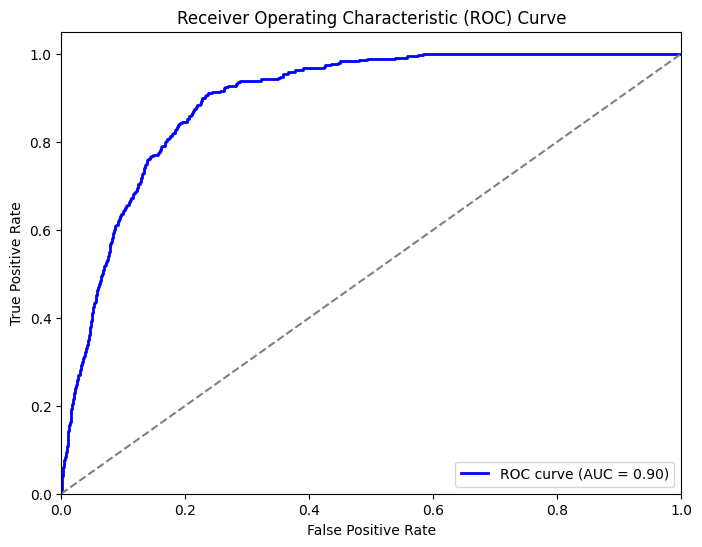

In [36]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt

y_probs = xg3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = sm.roc_curve(y_test, y_probs)

# AUC (Area Under the ROC Curve) 계산
auc = sm.roc_auc_score(y_test, y_probs)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()